## DATA PRE-PROCESSING

**Here we are importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('max_colwidth', 500)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Before we start everything,we need a data.What we are basically doing here is importing our data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url=('/content/drive/MyDrive/Classroom/drugsComTrain_raw.tsv')
data=pd.read_csv(url,sep='\t')

**The data is about drugs ratings.Given a drug based on a patient's health condition, the patient writes a comment and rate the drug in correspondence to its effect or its ability to cure a particular health condition. Now that the data has been imported we explore the data to understand the data for examples we will check for missing values and many more**

## Data Exploratory

**"data.info()" gives us more information of the data.Looking at the information, we can tell that the data has seven features which are unnamed :0,drugName,condition,review,rating,date and the usefulcount.There are 161297 observations.**

Description of each feature

1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful.

Here we check the  number unique characters in each feature.

## Checking for missing data

We are checking for any missing data because having  missing data reduce the prediction power of the data  and also the ability to draw a better conclusion from the data.

From the barplots above,We can observe that only the feature condition has a missing data and its one percentage.The next decision is to drop the missing data.This will reduce our data sets. We are dropping the missing data because  dropping  one percentage of the data does not affect the information in the data since we have 99 percentage data not missing. Below is the code for dropping the missing values.

**Extracting vocabulary**

## splitting the datasets##

0.0    160398
Name: rating, dtype: int64

In [ ]:
nancy=pd.read_csv('lastdata.csv')
nancy

,drugName_0,drugName_1,drugName_2,drugName_3,drugName_4,drugName_5,drugName_6,drugName_7,drugName_8,drugName_9,drugName_10,drugName_11,drugName_12,condition_0,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,rating,usefulCount,mark
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,-0.030106,-0.548140
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,4.495665,2.922455
2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0.0,-0.304396,1.187157
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,-0.496398,-0.548140
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0.244183,1.187157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160393,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,10.0,2.657927,-0.548140
160394,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1.0,0.161896,1.187157
160395,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,2.0,0.189325,-0.548140
160396,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,1,10.0,1.396197,-0.548140


In [ ]:
for i in range(nancy.shape[0]):
  if nancy['rating'][i]<5:
    nancy['rating'][i]=int(0)
  else:
    if nancy['rating'][i]<8:
      nancy['rating'][i]=int(1)
    else:
      nancy['rating'][i]=int(2)

In [ ]:
nancy['rating'].astype('category')

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
160393    2.0
160394    0.0
160395    0.0
160396    2.0
160397    2.0
Name: rating, Length: 160398, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
nancy['rating'] = labelencoder.fit_transform(nancy['rating'])
nancy['rating']

0         0
1         0
2         0
3         0
4         0
         ..
160393    2
160394    0
160395    0
160396    2
160397    2
Name: rating, Length: 160398, dtype: int64

In [ ]:
nancy['rating'].value_counts()

2.0    96895
0.0    39851
1.0    23652
Name: rating, dtype: int64

In [ ]:
nancy['rating'].value_counts()

2    96895
0    39851
1    23652
Name: rating, dtype: int64

In [ ]:
lastversion=nancy.to_csv('datagroup2.csv')

In [ ]:
nancy.head()

,drugName_0,drugName_1,drugName_2,drugName_3,drugName_4,drugName_5,drugName_6,drugName_7,drugName_8,drugName_9,drugName_10,drugName_11,drugName_12,condition_0,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,rating,usefulCount,mark
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.030106,-0.548140
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,4.495665,2.922455
2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,-0.304396,1.187157
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.496398,-0.548140
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.244183,1.187157


In [ ]:
column=nancy.columns
colums=column[0:-3]

In [ ]:
colums=list(colums)+['usefulCount','mark']
colums

['drugName_0',
 'drugName_1',
 'drugName_2',
 'drugName_3',
 'drugName_4',
 'drugName_5',
 'drugName_6',
 'drugName_7',
 'drugName_8',
 'drugName_9',
 'drugName_10',
 'drugName_11',
 'drugName_12',
 'condition_0',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'condition_6',
 'condition_7',
 'condition_8',
 'condition_9',
 'condition_10',
 'usefulCount',
 'mark']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nancy[colums], nancy['rating'], random_state=42 ,
                                                    test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(128318, 26)
(32080, 26)
(128318,)
(32080,)


## Random Forest

In [ ]:
# import sklear.ensemble import RandomForestClassifier
mod=RandomForestClassifier(n_estimators=100)
mod.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred1=mod.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.44      0.32      0.37      7870
           1       0.19      0.08      0.12      4795
           2       0.71      0.72      0.72     19415

   micro avg       0.61      0.53      0.57     32080
   macro avg       0.45      0.37      0.40     32080
weighted avg       0.57      0.53      0.54     32080
 samples avg       0.53      0.53      0.53     32080



**KNN Algorithm**


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**We predict our test data**

In [ ]:
y_pred = classifier.predict(X_test)

**Evaluating the algorithm**

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3929   640  3301]
 [ 1847   414  2534]
 [ 4392  1011 14012]]
              precision    recall  f1-score   support

           0       0.39      0.50      0.44      7870
           1       0.20      0.09      0.12      4795
           2       0.71      0.72      0.71     19415

    accuracy                           0.57     32080
   macro avg       0.43      0.44      0.42     32080
weighted avg       0.55      0.57      0.56     32080



## Building Model by deep learning


Before we build our model we have to know our input dimension of the data.The optimizers,loss functions,activation functions are all important in the model building.We are using the softmax function for the output layer because of our multi-class classification problem.The optimizer is used to determine the error or loss between the computed and desired output.The loss function is used to compute the error  and it is reduced by the optimizer.

In [ ]:
pip install keras

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
 
print(tf.__version__)

2.4.1


In [ ]:
y_train=keras.utils.to_categorical(y_train,num_classes=3)
y_test=keras.utils.to_categorical(y_test,num_classes=3)

In [ ]:
input_dim = X_train.shape[1]  # Number of features
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 64)                1728      
_________________________________________________________________
dense_63 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_64 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_65 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_66 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_67 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_68 (Dense)             (None, 24)              

**Training model**

Now the model is ready to be trained.We start training the model at this stage."model.fit()" simplify means the training process of the model has began.

In [ ]:
history = model.fit(X_train,y_train,epochs=20,batch_size=100,validation_split = 0.2)

Epoch 1/20
1027/1027 [==============================] - 4s 3ms/step - loss: 0.8957 - accuracy: 0.6058 - val_loss: 0.8623 - val_accuracy: 0.6257
Epoch 2/20
1027/1027 [==============================] - 3s 3ms/step - loss: 0.8670 - accuracy: 0.6181 - val_loss: 0.8473 - val_accuracy: 0.6294
Epoch 3/20
1027/1027 [==============================] - 3s 3ms/step - loss: 0.8544 - accuracy: 0.6235 - val_loss: 0.8420 - val_accuracy: 0.6339
Epoch 4/20
1027/1027 [==============================] - 3s 3ms/step - loss: 0.8478 - accuracy: 0.6285 - val_loss: 0.8423 - val_accuracy: 0.6317
Epoch 5/20
1027/1027 [==============================] - 3s 3ms/step - loss: 0.8359 - accuracy: 0.6357 - val_loss: 0.8371 - val_accuracy: 0.6326
Epoch 6/20
1027/1027 [==============================] - 3s 3ms/step - loss: 0.8330 - accuracy: 0.6363 - val_loss: 0.8364 - val_accuracy: 0.6335
Epoch 7/20
1027/1027 [==============================] - 3s 3ms/step - loss: 0.8311 - accuracy: 0.6346 - val_loss: 0.8358 - val_accuracy:

Metrics like the accuracy used to monitor the training and testing steps.

In [ ]:
score=model.evaluate(X_test,y_test,verbose=0)
print('Test score:',score[0])
print('Test accuracy:',score[1])

Test score: 0.8358822464942932
Test accuracy: 0.6333853006362915


**Evaluating the test data with the model**

Here, we are checking how the model is performing on the test data.

In [ ]:
#from sklearn.metrics import accuracy_score(y_test,y_pred)

In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45      7870
           1       0.11      0.00      0.00      4795
           2       0.68      0.87      0.77     19415

    accuracy                           0.63     32080
   macro avg       0.42      0.44      0.41     32080
weighted avg       0.55      0.63      0.57     32080

[[ 3470     5  4395]
 [ 1431     1  3363]
 [ 2564     3 16848]]


##Visualizing the validation and training data

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

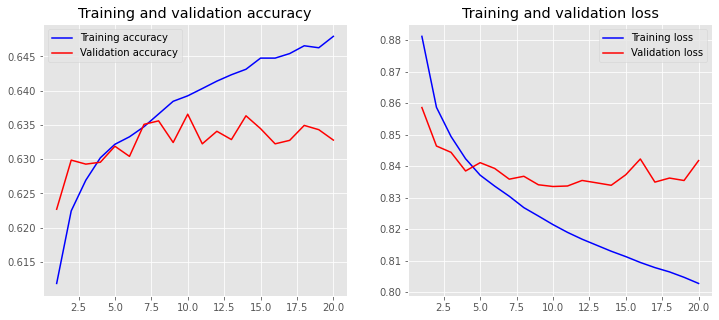

In [ ]:
plot_history(history)